In [69]:
#Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")

In [70]:
# read dataset
url = "https://raw.githubusercontent.com/denindrap23/Machine-Learning/refs/heads/main/Predict-Customer-Personality-to-boost-marketing-campaign-by-using-Machine-Learning/marketing_campaign_data.csv"

df = pd.read_csv(url)
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0


# 1. Data Cleaning and Preprocessing

## 1.1 Data Null

In [71]:
# Hitung null
null_count = df.isnull().sum()

# Hitung persentase null
null_percentage = (null_count / len(df) * 100).round(2)

# Hitung non-null count
non_null_count = df.notnull().sum()

dtypes = df.dtypes

info_df = pd.DataFrame({
    'Data Type': dtypes,
    'Non-Null Count': non_null_count,
    'Null Count': null_count,
    'Null Percentage (%)': null_percentage
})

info_df

,Data Type,Non-Null Count,Null Count,Null Percentage (%)
Unnamed: 0,int64,2240,0,0.00
ID,int64,2240,0,0.00
Year_Birth,int64,2240,0,0.00
Education,object,2240,0,0.00
Marital_Status,object,2240,0,0.00
Income,float64,2216,24,1.07
Kidhome,int64,2240,0,0.00
Teenhome,int64,2240,0,0.00
Dt_Customer,object,2240,0,0.00
Recency,int64,2240,0,0.00


Data memiliki null values pada kolom `Income`, dengan 24 data (1.07%). Karena jumlah data null sangat sedikit, maka data null dapat dihilangkan/dibuang.

In [72]:
df = df.dropna()

## 1.2 Data Duplicate

In [73]:
df.duplicated().sum()

0

Tidak terdapat data duplicate

## 1.3 Drop Kolom yang tidak diibutuhkan

In [74]:
df = df.drop(columns=['Unnamed: 0'])
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,709000,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,406000,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,908000,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,428000,...,3,0,0,0,0,0,0,3,11,0


## 1.4 Add Feature

In [75]:
# Date Customer
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Menambahkan kolom untuk kebutuhan analisa (*Asumsi data dianalisa pada tahun 2022)
df['age'] = 2022 - df['Year_Birth']
df['join_at_age'] = df['Dt_Customer'].dt.year - df['Year_Birth']
df['total_kids'] = df['Kidhome'] + df['Teenhome']
df['is_parent'] = np.where(df['total_kids'] > 0,1,0)

# age_range
df.loc[(df['age'] >= 0) & (df['age'] < 12), 'age_range'] = "child"
df.loc[(df['age'] >= 12) & (df['age'] < 18), 'age_range'] = "teens"
df.loc[(df['age'] >= 18) & (df['age'] < 36), 'age_range'] = "young_adults"
df.loc[(df['age'] >= 36) & (df['age'] < 55), 'age_range'] = "middle_adults"
df.loc[(df['age'] >= 55), 'age_range'] = "older_adults"

# amount_spent
df['total_amount_spent'] = (df['MntCoke'] +
                            df['MntFruits'] +
                            df['MntMeatProducts'] +
                            df['MntFishProducts'] +
                            df['MntSweetProducts'] +
                            df['MntGoldProds'])

# accepted campaigns
df['total_accepted_campaigns'] = (df['AcceptedCmp1'] +
                                  df['AcceptedCmp2'] +
                                  df['AcceptedCmp3'] +
                                  df['AcceptedCmp4'] +
                                  df['AcceptedCmp5'])

# total transaction purchaced (*Asumsi pembelian adalah MECE (Mutually Exclusive and Collectively Exhaustive: Principle used to structure information or problems into distinct, non-overlapping categories that cover all possibilities.))
df['total_transaction'] = (df['NumDealsPurchases'] +
                           df['NumWebPurchases'] +
                           df['NumCatalogPurchases'] +
                           df['NumStorePurchases'])

# cvr (Conversion Rate)
def safe_div(x,y):
    if y == 0:
        return 0
    return x/y

df['cvr'] = df.apply(lambda x: safe_div(x['total_transaction'], x['NumWebVisitsMonth']), axis=1)                  

# 2. EDA: Conversion rate analysis based on income, spending and age

## 2.1 Statistical Summaries

In [76]:
# numerical & categorical
numerical_features = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 
                      'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                      'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                      'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                      'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue',
                      'age', 'join_at_age', 'total_kids', 'total_amount_spent'
                     ]

categorical_features = ['Education', 'Marital_Status',
                        'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                        'AcceptedCmp4', 'AcceptedCmp5', 'Complain',
                        'Response', 'is_parent', 'age_range'
                       ]

In [77]:
# numerical statistic

desc_nums = df[numerical_features].describe().round(3).T

for i, col in enumerate(numerical_features):
    desc_nums.loc[col, 'no_unique'] = df[col].nunique()

desc_nums['no_unique'] = desc_nums['no_unique'].astype(int)
desc_nums

,count,mean,std,min,25%,50%,75%,max,no_unique
Income,2216.0,5.224725e+07,2.517308e+07,1730000.0,35303000.0,51381500.0,68522000.0,666666000.0,1974
Kidhome,2216.0,4.420000e-01,5.370000e-01,0.0,0.0,0.0,1.0,2.0,3
Teenhome,2216.0,5.050000e-01,5.440000e-01,0.0,0.0,0.0,1.0,2.0,3
Recency,2216.0,4.901300e+01,2.894800e+01,0.0,24.0,49.0,74.0,99.0,100
MntCoke,2216.0,3.050916e+05,3.373279e+05,0.0,24000.0,174500.0,505000.0,1493000.0,776
MntFruits,2216.0,2.635605e+04,3.979392e+04,0.0,2000.0,8000.0,33000.0,199000.0,158
MntMeatProducts,2216.0,1.669959e+05,2.242833e+05,0.0,16000.0,68000.0,232250.0,1725000.0,554
MntFishProducts,2216.0,3.763764e+04,5.475208e+04,0.0,3000.0,12000.0,50000.0,259000.0,182
MntSweetProducts,2216.0,2.702888e+04,4.107205e+04,0.0,1000.0,8000.0,33000.0,262000.0,176
MntGoldProds,2216.0,4.396525e+04,5.181541e+04,0.0,9000.0,24500.0,56000.0,321000.0,212


In [78]:
# categorical statistic

desc_cats = df[categorical_features].astype(str).describe().T
desc_cats['frac_top'] = desc_cats['freq'] * 100 / df.shape[0]
desc_cats

,count,unique,top,freq,frac_top
Education,2216,5,S1,1116,50.361011
Marital_Status,2216,6,Menikah,857,38.673285
AcceptedCmp1,2216,2,0,2074,93.592058
AcceptedCmp2,2216,2,0,2186,98.646209
AcceptedCmp3,2216,2,0,2053,92.644404
AcceptedCmp4,2216,2,0,2052,92.599278
AcceptedCmp5,2216,2,0,2054,92.689531
Complain,2216,2,0,2195,99.052347
Response,2216,2,0,1883,84.972924
is_parent,2216,2,1,1583,71.435018


# 2.2 Bivariate Analysis

### 2.2.1 Correlation

<Axes: >

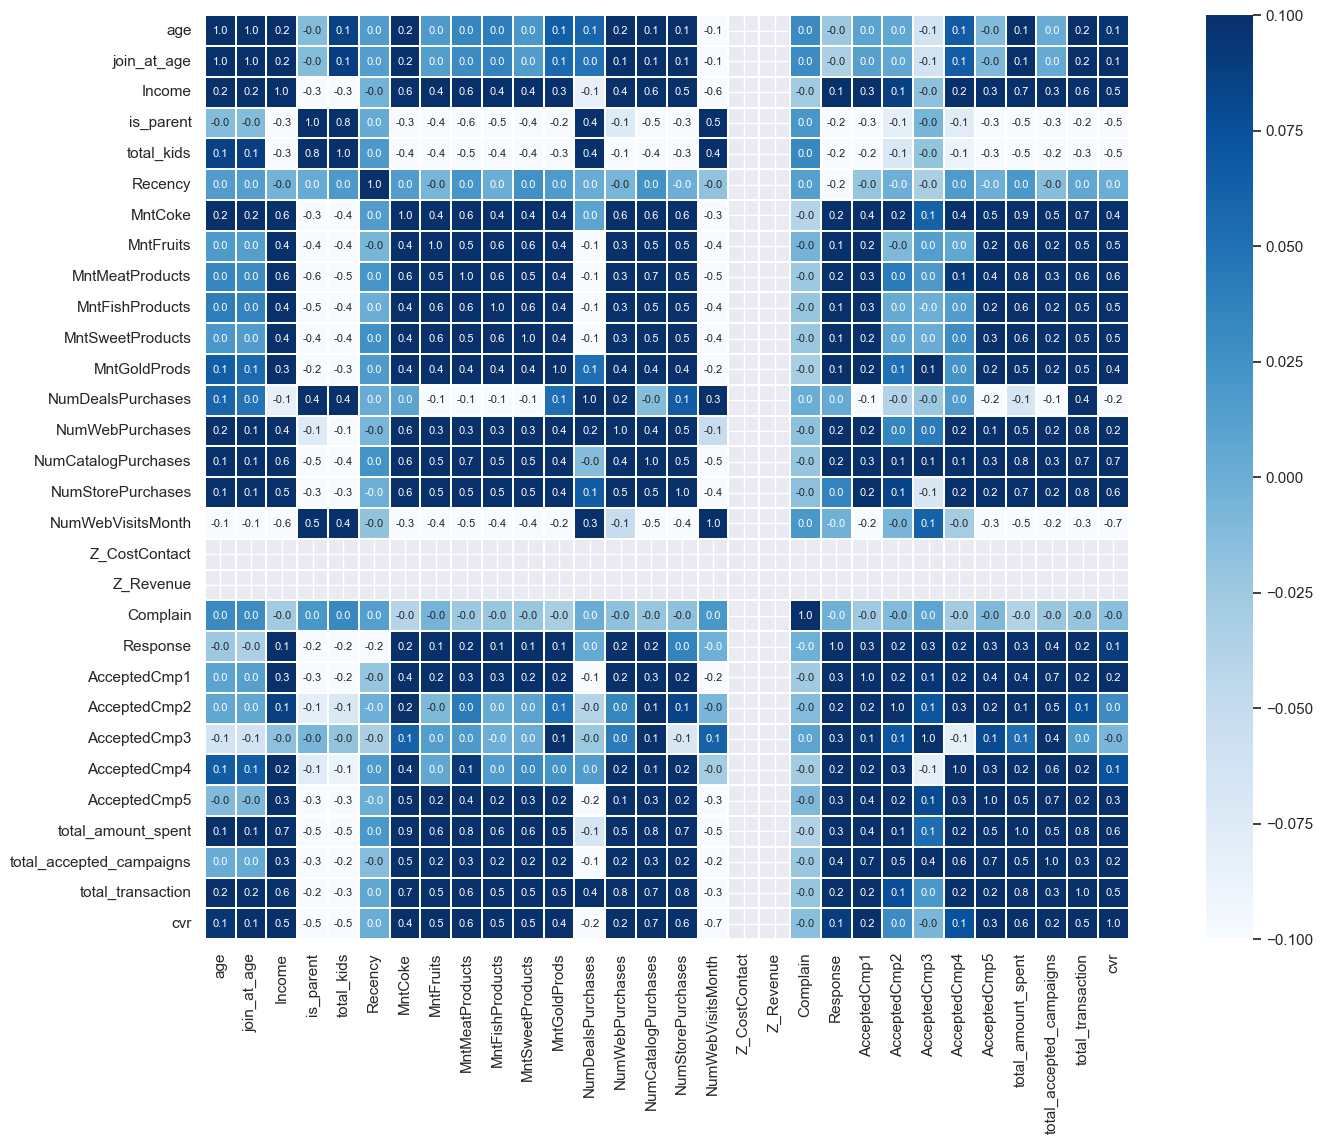

In [79]:
# correlation heatmap
plt.figure(figsize=(20, 12))

correlation = ['age', 'join_at_age', 'Income', 'is_parent', 'total_kids', 'Recency',
               'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
               'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 
               'Z_CostContact', 'Z_Revenue', 'Complain', 'Response',
               'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
               'total_amount_spent', 'total_accepted_campaigns', 'total_transaction', 'cvr']

corrmat = df[correlation].corr()
sns.heatmap(corrmat, cmap='Blues', annot=True, fmt='.1f',
            vmin=corrmat.values.min(), vmax=1,
            square=True, linewidths=0.1, annot_kws={"fontsize":8})

### 2.2.2 Income vs Spending and Conversion Rate

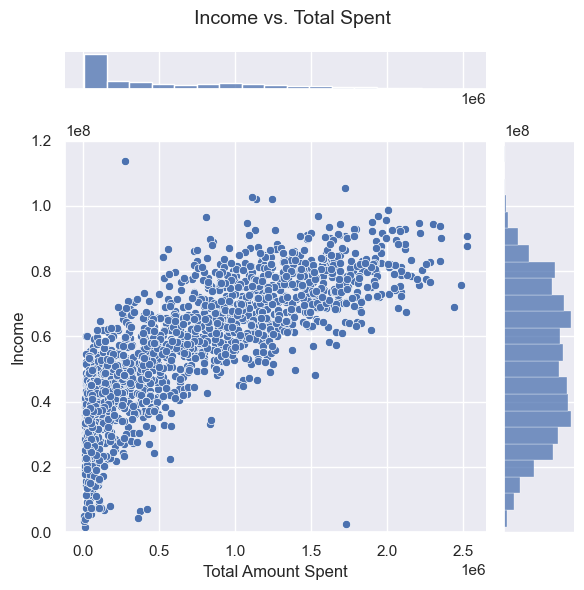

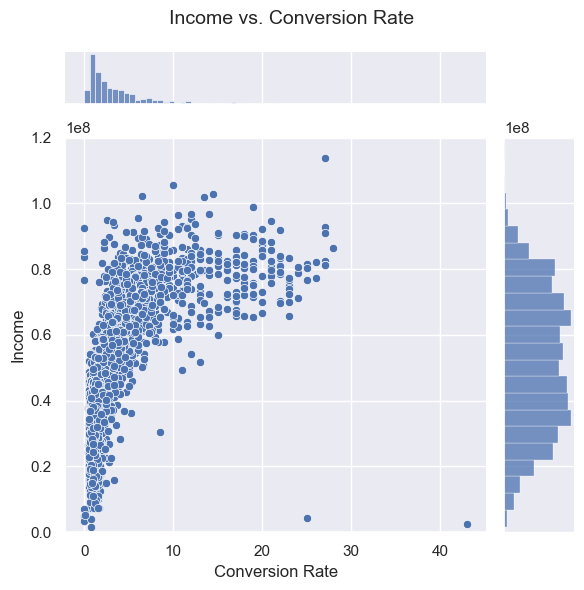

In [80]:
# Income vs Spending
plot = sns.jointplot(x=df['total_amount_spent'], y=df['Income'])

plot.fig.suptitle("Income vs. Total Spent", fontsize=14)
plot.fig.subplots_adjust(top=0.95)

plot.ax_joint.set_xlabel("Total Amount Spent", fontsize=12)
plot.ax_joint.set_ylabel("Income", fontsize=12)

plot.ax_joint.grid(True)

plot.ax_marg_y.set_ylim(0, 120000000)

plot.fig.tight_layout()
plt.savefig('income_vs_spent.png', dpi=200)
plt.show()

# Income vs Conversion Rate
plot = sns.jointplot(x=df['cvr'], y=df['Income'])

plot.fig.suptitle("Income vs. Conversion Rate", fontsize=14)
plot.fig.subplots_adjust(top=0.95)

plot.ax_joint.set_xlabel("Conversion Rate", fontsize=12)
plot.ax_joint.set_ylabel("Income", fontsize=12)

plot.ax_joint.grid(True)

plot.ax_marg_y.set_ylim(0, 120000000)

plot.fig.tight_layout()
plt.savefig('income_vs_cvr.png', dpi=200)
plt.show()

### 2.2.3 Conversion Rate vs Spending

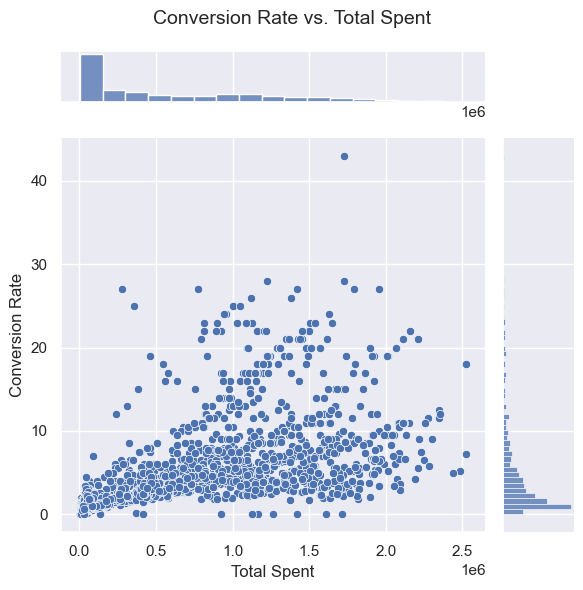

In [81]:
#Conversion Rate vs Spending
plot = sns.jointplot(x=df['total_amount_spent'], y=df['cvr'])

plot.fig.suptitle("Conversion Rate vs. Total Spent", fontsize=14)
plot.fig.subplots_adjust(top=0.95)

plot.ax_joint.set_xlabel("Total Spent", fontsize=12)
plot.ax_joint.set_ylabel("Conversion Rate", fontsize=12)

plot.ax_joint.grid(True)

plot.fig.tight_layout()
plt.savefig('cvr_vs_spent.png', dpi=200)
plt.show()

### 2.2.4 Age vs Spending, Income and Conversion Rate

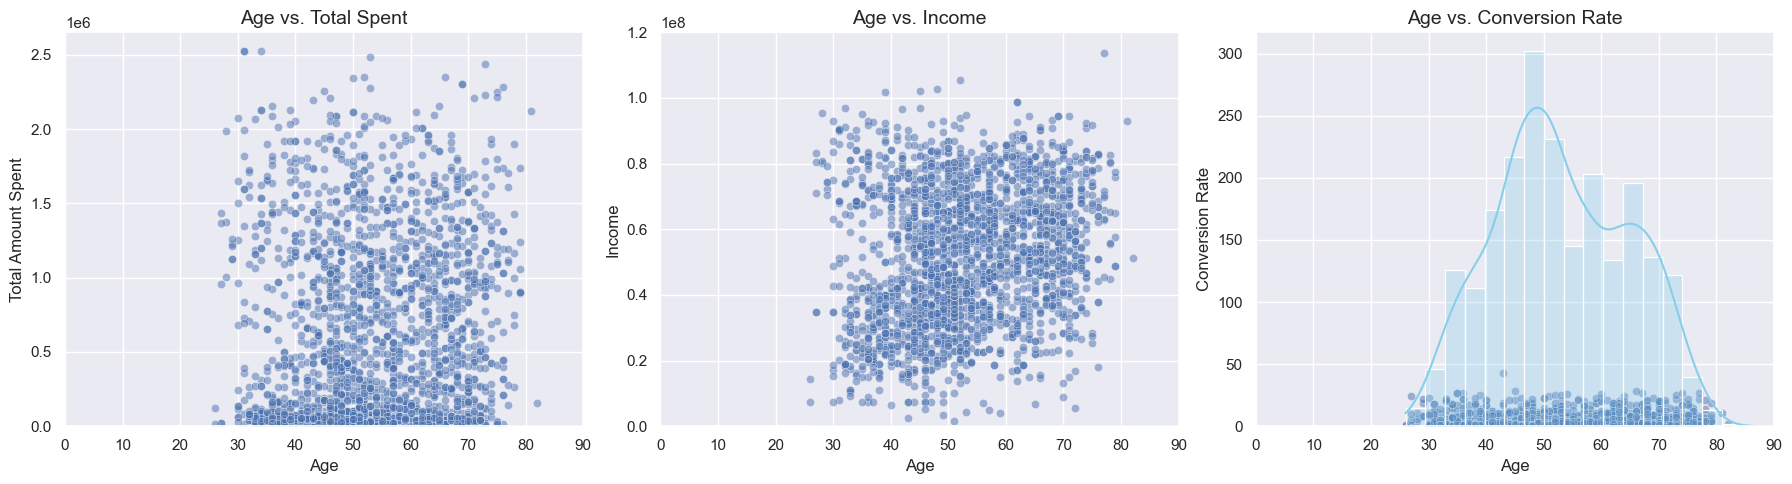

In [82]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Age vs Total Spent
sns.scatterplot(ax=axs[0], x=df['age'], y=df['total_amount_spent'], alpha=0.5)
sns.histplot(ax=axs[0], x=df['age'], bins=30, kde=True, color='skyblue', alpha=0.3)
axs[0].set_title("Age vs. Total Spent", fontsize=14)
axs[0].set_xlabel("Age", fontsize=12)
axs[0].set_ylabel("Total Amount Spent", fontsize=12)
axs[0].grid(True)
axs[0].set_xlim(0, 90)

# Age vs Income
sns.scatterplot(ax=axs[1], x=df['age'], y=df['Income'], alpha=0.5)
sns.histplot(ax=axs[1], x=df['age'], bins=30, kde=True, color='skyblue', alpha=0.3)
axs[1].set_title("Age vs. Income", fontsize=14)
axs[1].set_xlabel("Age", fontsize=12)
axs[1].set_ylabel("Income", fontsize=12)
axs[1].grid(True)
axs[1].set_xlim(0, 90)
axs[1].set_ylim(0, 1.2e8)

# Age vs Conversion Rate
sns.scatterplot(ax=axs[2], x=df['age'], y=df['cvr'], alpha=0.5)
sns.histplot(ax=axs[2], x=df['age'], bins=30, kde=True, color='skyblue', alpha=0.3)
axs[2].set_title("Age vs. Conversion Rate", fontsize=14)
axs[2].set_xlabel("Age", fontsize=12)
axs[2].set_ylabel("Conversion Rate", fontsize=12)
axs[2].grid(True)
axs[2].set_xlim(0, 90)

plt.tight_layout()
plt.savefig('age_analysis.png', dpi=200)
plt.show()

# 3. Feature Engineering

## 3.1 Feature Encoding

In [83]:
for col in categorical_features:
    print(f'value counts of column {col}')
    print(df[col].value_counts())
    print('---'*10, '\n')

value counts of column Education
Education
S1     1116
S3      481
S2      365
D3      200
SMA      54
Name: count, dtype: int64
------------------------------ 

value counts of column Marital_Status
Marital_Status
Menikah        857
Bertunangan    573
Lajang         475
Cerai          232
Janda           76
Duda             3
Name: count, dtype: int64
------------------------------ 

value counts of column AcceptedCmp1
AcceptedCmp1
0    2074
1     142
Name: count, dtype: int64
------------------------------ 

value counts of column AcceptedCmp2
AcceptedCmp2
0    2186
1      30
Name: count, dtype: int64
------------------------------ 

value counts of column AcceptedCmp3
AcceptedCmp3
0    2053
1     163
Name: count, dtype: int64
------------------------------ 

value counts of column AcceptedCmp4
AcceptedCmp4
0    2052
1     164
Name: count, dtype: int64
------------------------------ 

value counts of column AcceptedCmp5
AcceptedCmp5
0    2054
1     162
Name: count, dtype: int64
-----

In [84]:
# label encoder
mapping_education = {
    'SMA' : 0,
    'D3' : 1,
    'S1' : 2,
    'S2' : 3,
    'S3' : 4
}
df['Education_mapped'] = df['Education'].map(mapping_education)

In [85]:
# df1 = df.copy()

# One hot encoder
# for cat in ['Marital_Status', 'age_range', 'is_parent']:
#     onehots = pd.get_dummies(df[cat], prefix=cat)
#     df1 = df1.join(onehots)
# df1

## 3.2 Feature Standarization

In [86]:
from sklearn.preprocessing import StandardScaler
df_scaled = df.copy()
ss = StandardScaler()

for col in numerical_features:
    df_scaled[col] = ss.fit_transform(df_scaled[[col]])
    
display(df_scaled.shape, df_scaled.head(3))

(2216, 39)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,age,join_at_age,total_kids,is_parent,age_range,total_amount_spent,total_accepted_campaigns,total_transaction,cvr,Education_mapped
0,5524,1957,S1,Lajang,0.234063,-0.823039,-0.928972,2012-09-04,0.310532,0.978226,...,0.986443,0.897752,-1.264803,0,older_adults,1.675488,0,25,3.571429,2
1,2174,1954,S1,Lajang,-0.234559,1.039938,0.909066,2014-03-08,-0.380509,-0.872024,...,1.236801,1.313688,1.405806,1,older_adults,-0.962358,0,6,1.200000,2
2,4141,1965,S1,Bertunangan,0.769478,-0.823039,-0.928972,2013-08-21,-0.795134,0.358511,...,0.318822,0.315443,-1.264803,0,older_adults,0.280250,0,21,5.250000,2


# 4. Data Modeling

## 4.1 K-Means Clustering

[104357.52401903135, 77987.73445441776, 61653.3979086467, 55403.982278592266, 50592.68414059096, 46988.587264183145, 44161.5774884164, 42516.8665485111, 40018.52473163664, 39014.972111892544, 38088.3211722625, 37352.45229853534, 36358.92261571992, 35810.9050854127, 34729.14034617596, 34057.887354716324, 33379.71036186295, 32954.42809148433]


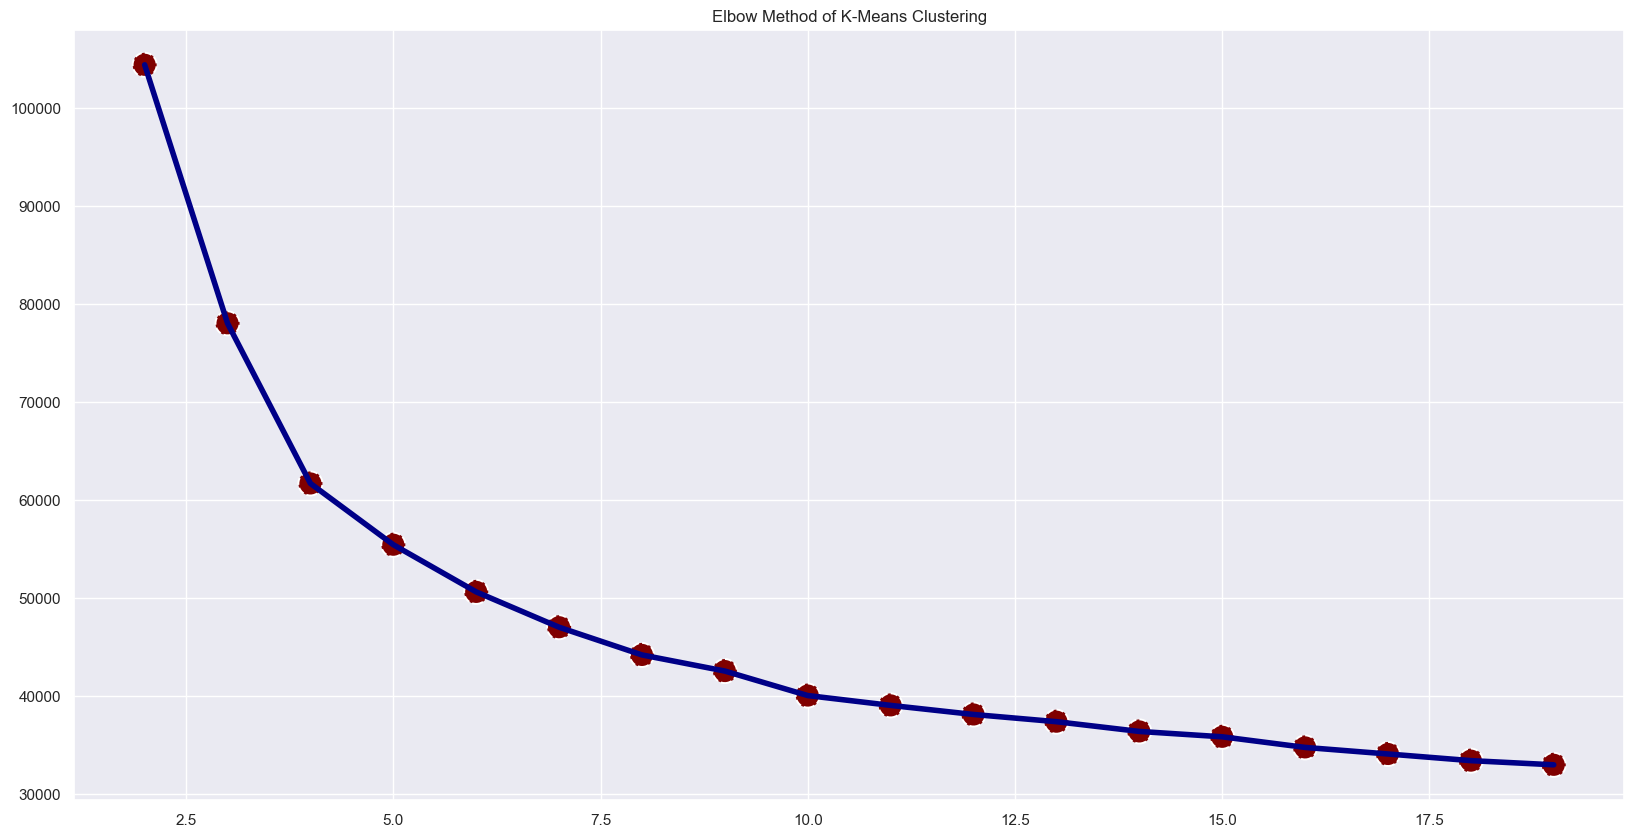

In [87]:
from sklearn.cluster import KMeans
X = df_scaled.drop(columns=['ID', 'Year_Birth', 'Education', 'Marital_Status', 'age_range', 'Dt_Customer']).copy()

inertia = []

for i in range(2,20):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X.values)
    inertia.append(kmeans.inertia_)

print(inertia)
plt.figure(figsize=(20, 10))
plt.title('Elbow Method of K-Means Clustering')

sns.lineplot(x=range(2, 20), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 20), y=inertia, s=300, color='#800000',  linestyle='--')
plt.savefig('k-means_clustering.png', dpi=200)

Terlihat penurunan tajam pada WCSS dari K=1 hingga K=3-4, menunjukkan setiap penambahan cluster pada tahap ini secara signifikan mengurangi variasi dalam cluster. Setelah K=4, penurunan WCSS melambat secara signifikan, menunjukkan penambahan cluster setelah titik ini tidak banyak memberikan peningkatan pengelompokan yang berarti. Sehingga jumlah cluster optimal adalah K = 4.

In [88]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X.values)
X['cluster'] = kmeans.labels_
df['cluster'] = kmeans.labels_

<Axes: xlabel='total_amount_spent', ylabel='Income'>

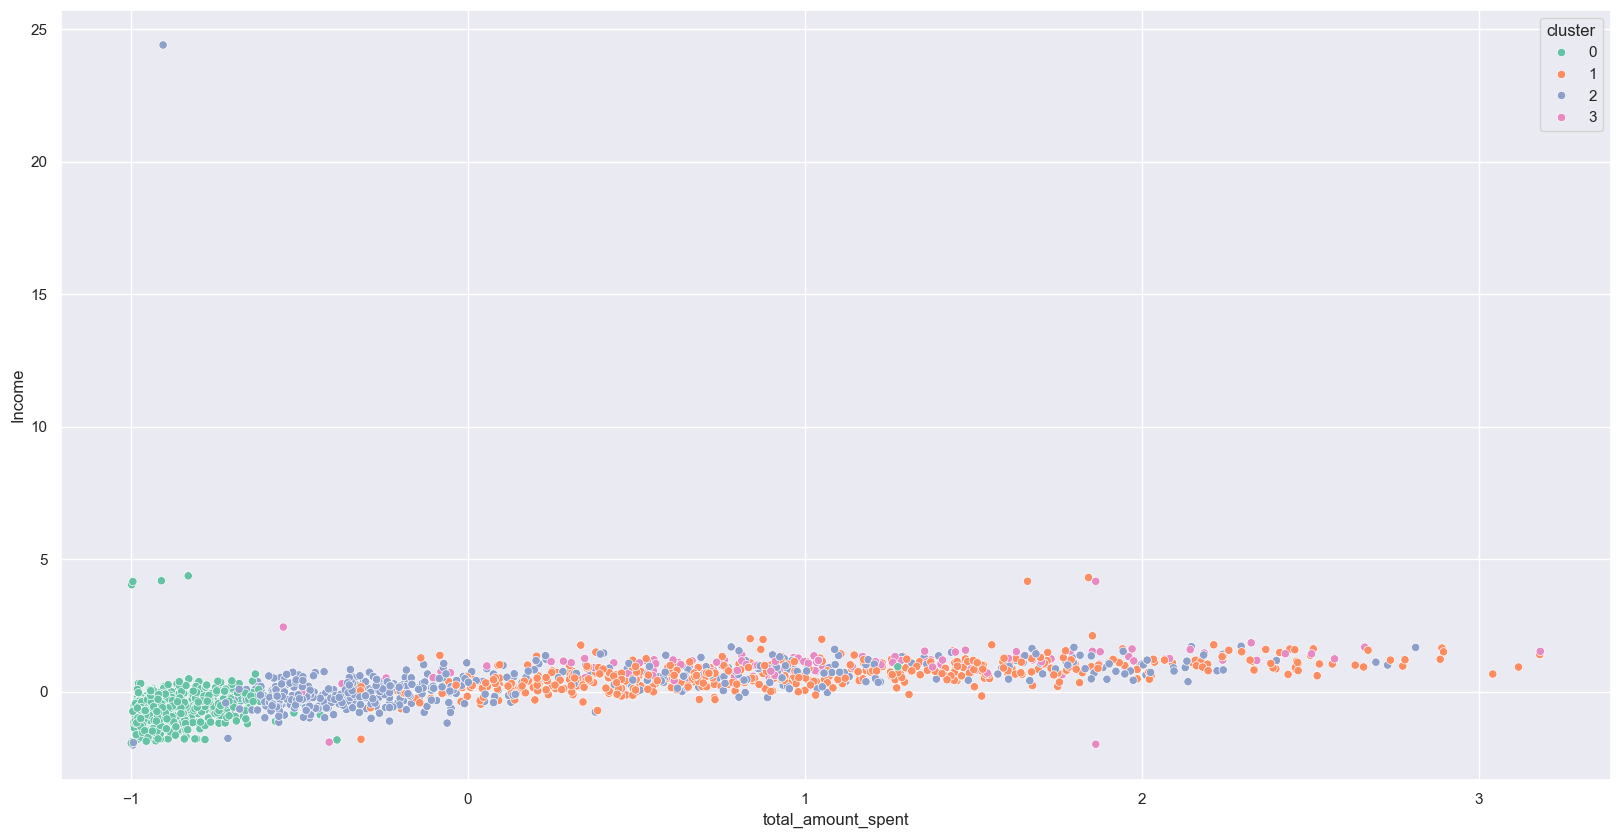

In [89]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=X, x='total_amount_spent', y='Income', hue='cluster', palette="Set2")

# 5. Evaluation

## 5.1 Silhouette Score

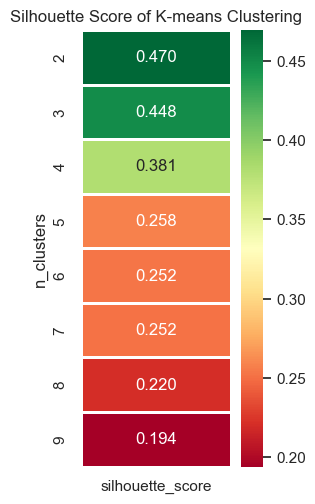

In [90]:
from sklearn.metrics import silhouette_score

def visualize_silhouette_layer(data):
    clusters_range = range(2,10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=42)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure(figsize=(3,5))
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='RdYlGn')
    plt.tight_layout()
    plt.title('Silhouette Score of K-means Clustering')
    plt.savefig('silhouette_score.png', dpi=200)
    plt.show()

visualize_silhouette_layer(X)

K=2 memiliki nilai Silhouette Score tertinggi (0.470), K=3 dan K=4 masih baik (0.448 dan 0.381) dengan kualitas cukup tinggi dan Nilai Silhouette Score menurun secara bertahap. K=2 memberikan kualitas cluster terbaik secara teknis berdasarkan Silhouette Score. Namun, K=3 atau K=4 juga masih memiliki skor tinggi dengan penurunan wajar, sambil memberikan granularitas lebih detail dalam segmentasi.

## 5.2 PCA

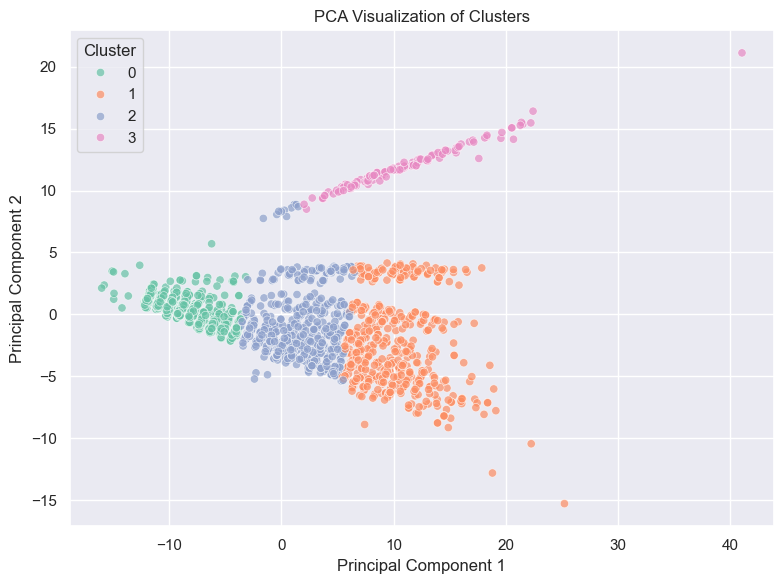

In [91]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# PCA transform 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Menambahkan hasil PCA ke dataframe
df['pca_1'] = pca_result[:, 0]
df['pca_2'] = pca_result[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(x='pca_1', y='pca_2', hue='cluster',
                data=df, palette="Set2", alpha=0.7)

plt.title('PCA Visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.savefig('pca.png', dpi=200)
plt.show()

PCA berhasil mereduksi dimensi dari banyak fitur menjadi 2 dimensi sambil tetap menjaga struktur pemisahan cluster. Ini mengindikasikan hasil K-Means clustering memiliki kualitas pemisahan yang baik di data, yang dapat digunakan untuk segmentasi customer/produk dalam analisis bisnis.

## 5.3 t-SNE

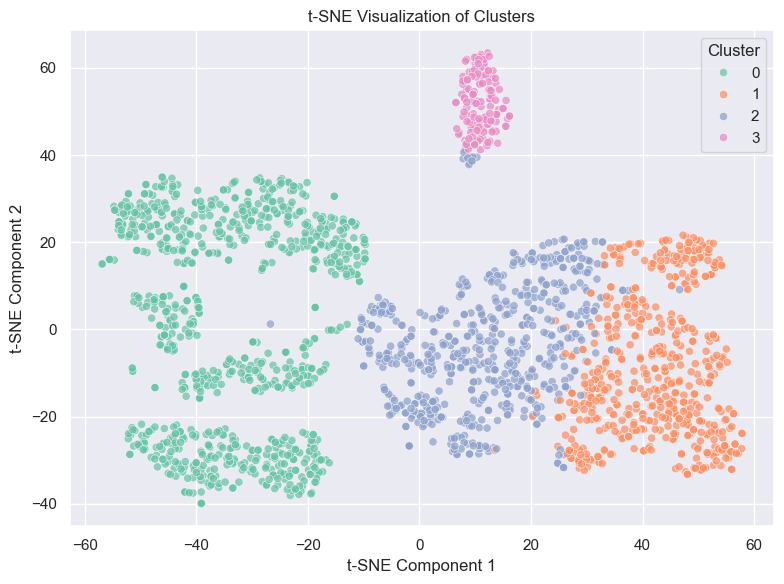

In [92]:
from sklearn.manifold import TSNE

# t-SNE transform 2D
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
tsne_result = tsne.fit_transform(X)

# Menambahkan hasil t-SNE ke dataframe
df['tsne_1'] = tsne_result[:, 0]
df['tsne_2'] = tsne_result[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(x='tsne_1', y='tsne_2', hue='cluster',
                data=df, palette="Set2", alpha=0.7)

plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.savefig('t-SNE.png', dpi=200)
plt.show()

Hasil clustering valid, karena cluster secara visual terlihat terpisah rapi pada t-SNE. Cluster yang terpisah jauh (seperti cluster 3) berpotensi sebagai high-value segment atau anomalous segment untuk strategi marketing khusus. Cluster yang berdekatan (0, 1, 2) menunjukkan adanya hubungan, sehingga kita dapat mengeksplorasi profil demografi dan perilaku lebih detail untuk menyusun campaign personalisasi.

# 6. Customer Personality Analysis for Marketing Retargeting

## 6.1 Cluster Analysis & Interpretation

### 6.1.1 Statistical Summary per Cluster

In [93]:
df[numerical_features+['cluster']].groupby('cluster')[['Income','total_amount_spent']].describe().T

cluster                              0             1             2  \
Income             count  9.210000e+02  5.550000e+02  6.030000e+02   
                   mean   3.389483e+07  6.851933e+07  5.930679e+07   
                   std    1.435191e+07  1.320104e+07  2.904005e+07   
                   min    3.502000e+06  7.144000e+06  1.730000e+06   
                   25%    2.488200e+07  6.047400e+07  4.724750e+07   
                   50%    3.344400e+07  6.811800e+07  5.770500e+07   
                   75%    4.127500e+07  7.682400e+07  6.910250e+07   
                   max    1.623970e+08  1.608030e+08  6.666660e+08   
total_amount_spent count  9.210000e+02  5.550000e+02  6.030000e+02   
                   mean   7.725624e+04  1.191553e+06  7.233798e+05   
                   std    7.278628e+04  4.431226e+05  4.924572e+05   
                   min    5.000000e+03  4.150000e+05  8.000000e+03   
                   25%    3.600000e+04  8.400000e+05  3.555000e+05   
                   50%    5.700000e+04  1.113000e+06  5.070000e+05   
                   75%    9.600000e+04  1.495000e+06  1.048500e+06   
                   max    1.376000e+06  2.524000e+06  2.302000e+06   

cluster                              3  
Income             count  1.370000e+02  
                   mean   7.863174e+07  
                   std    1.416946e+07  
                   min    2.447000e+06  
                   25%    7.267900e+07  
                   50%    8.012400e+07  
                   75%    8.382900e+07  
                   max    1.571460e+08  
total_amount_spent count  1.370000e+02  
                   mean   1.289168e+06  
                   std    4.326243e+05  
                   min    2.770000e+05  
                   25%    9.880000e+05  
                   50%    1.216000e+06  
                   75%    1.574000e+06  
                   max    2.525000e+06

In [94]:
map_cluster = {
    0 : 'Risk of Churn',
    1 : 'Mid Spender',
    2 : 'Low Spender',
    3 : 'High Spender'
}

df['cluster_mapped'] = df['cluster'].map(map_cluster)

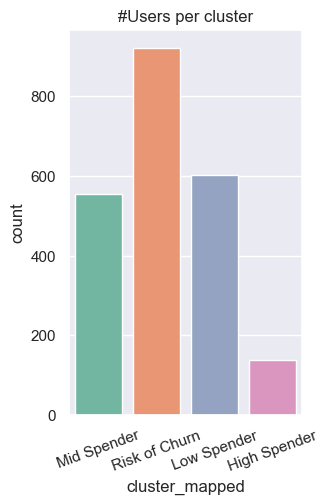

In [95]:
# Total user per Cluster
sns.set(rc={'figure.figsize':(3,5)})
sns.countplot(x=df['cluster_mapped'], palette="Set2")
plt.title('#Users per cluster')
plt.xticks(rotation=20)
plt.savefig('user_cluster.png', dpi=200)

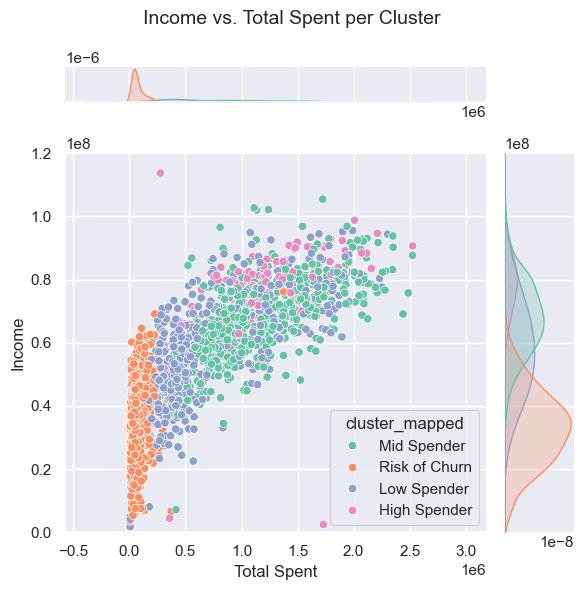

In [96]:
#Income vs Spending
plot = sns.jointplot(x=df['total_amount_spent'], y=df['Income'], hue=df["cluster_mapped"], palette="Set2")

plot.fig.suptitle("Income vs. Total Spent per Cluster", fontsize=14)
plot.fig.subplots_adjust(top=0.95)

plot.ax_joint.set_xlabel("Total Spent", fontsize=12)
plot.ax_joint.set_ylabel("Income", fontsize=12)

plot.ax_joint.grid(True)

plot.ax_marg_y.set_ylim(0, 120000000)

plot.fig.tight_layout()
plt.savefig('income_vs_spent_cluster.png', dpi=200)
plt.show()

### 

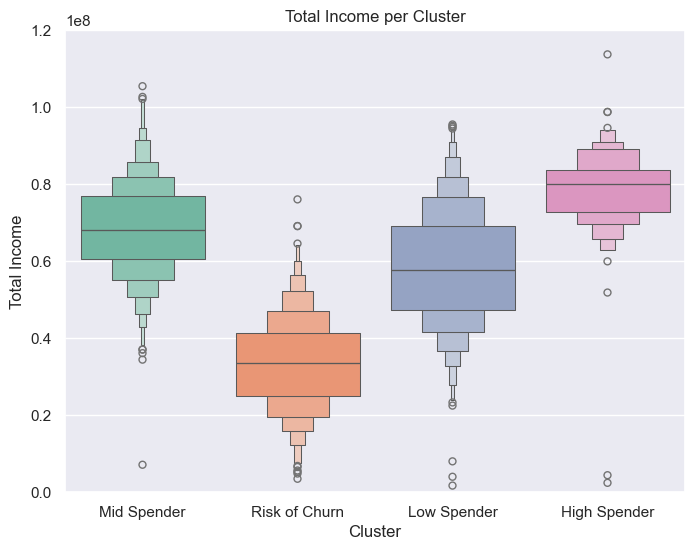

In [97]:
# Boxplot Total Income per Cluster
plt.figure(figsize=(8,6))
sns.boxenplot(x=df['cluster_mapped'], y=df['Income'], palette="Set2")

plt.title('Total Income per Cluster')
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Total Income", fontsize=12)

plt.ylim(0, 120000000)
plt.savefig('income_cluster.png', dpi=200)

### 6.1.3 Total Spent per Cluster

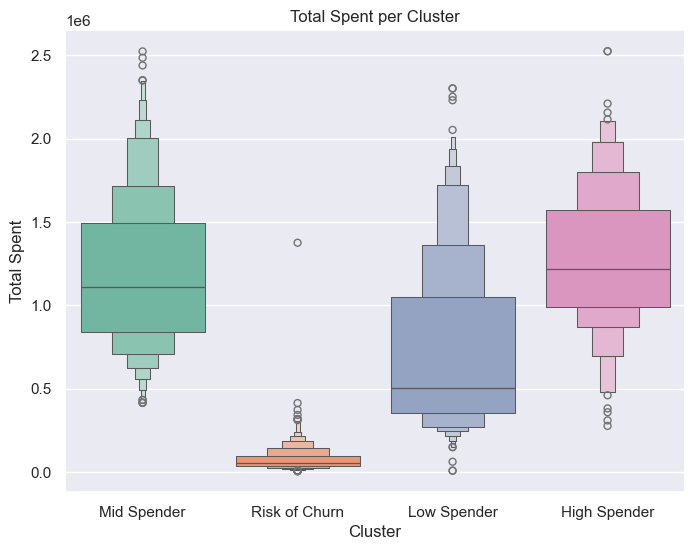

In [98]:
# Boxplot Total Spending per Cluster
plt.figure(figsize=(8,6))
sns.boxenplot(x=df['cluster_mapped'], y=df['total_amount_spent'], palette="Set2")

plt.title('Total Spent per Cluster')
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Total Spent", fontsize=12)
plt.savefig('spent_cluster.png', dpi=200)

### 6.1.4 Total Visits per Cluster

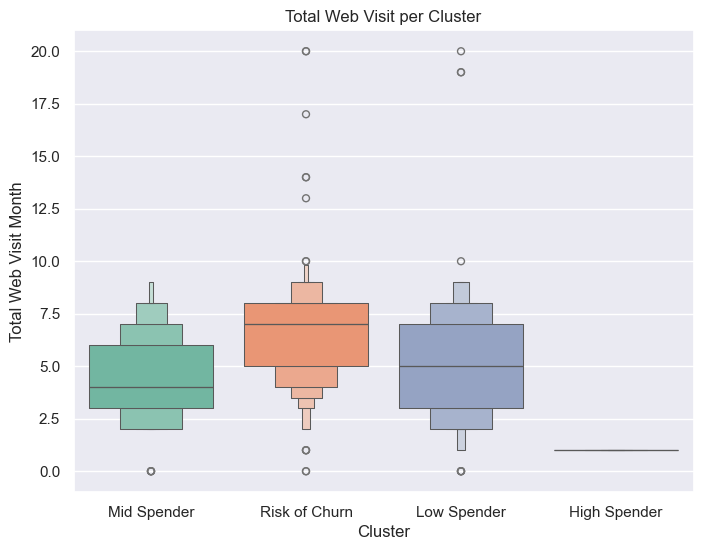

In [99]:
# Boxplot Total Visits per Cluster
plt.figure(figsize=(8,6))
sns.boxenplot(x=df['cluster_mapped'], y=df['NumWebVisitsMonth'], palette="Set2")

plt.title('Total Web Visit per Cluster')
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Total Web Visit Month", fontsize=12)
plt.savefig('web_visit_cluster.png', dpi=200)

### 6.1.5 Deal Puchased per Cluster

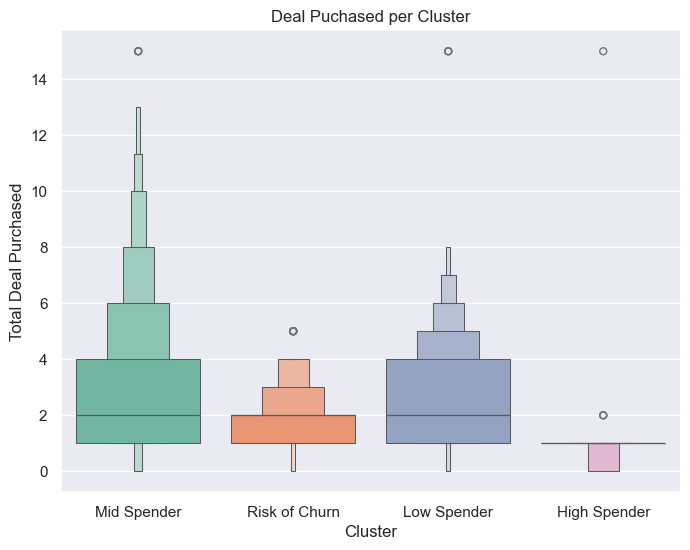

In [100]:
# Boxplot Deal Puchased per Cluster
plt.figure(figsize=(8,6))
sns.boxenplot(x=df['cluster_mapped'], y=df['NumDealsPurchases'], palette="Set2")

plt.title('Deal Puchased per Cluster')
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Total Deal Purchased", fontsize=12)
plt.savefig('deal_purchased_cluster.png', dpi=200)

### 6.1.6 Conversion per Cluster

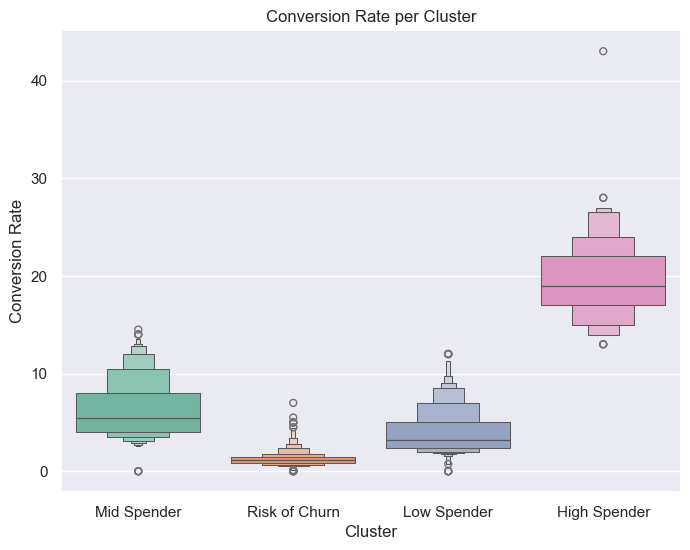

In [101]:
# Boxplot Conversion per Cluster
plt.figure(figsize=(8,6))
sns.boxenplot(x=df['cluster_mapped'], y=df['cvr'], palette="Set2")

plt.title('Conversion Rate per Cluster')
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Conversion Rate", fontsize=12)
plt.savefig('cvr_cluster.png', dpi=200)

## 6.2 Interpretation Cluster Summary

1. Low Spender:
- Kelompok ini didominasi oleh older_adults (>55 tahun) dan middle_aged_adults (36-55 tahun), yang dominan telah menikah dan mempunyai 1 anak
- Kelompok ini mengunjungi website cukup sering, kedua tersering setelah Cluster 1, dengan median sebanyak 5 kali dalam sebulan, walaupun demikian, kelompok ini cukup sering mencari promo yang masing-masing orangnya membeli promo 2 kali dalam sebulan (median)
- Namun, kelompok ini mempunyai total pendapatan dan pengeluaran terkecil kedua dibandingkan Kelompok lainnya, yang masing-masing sebesar IDR 57 Juta untuk total pendapatan setahun, dan IDR 506K untuk pengeluaran dalam setahun


2. Risk of Churn:
- Kelompok ini adalah kelompok dengan jumlah user terbesar sebanyak 900 orang yang di dominasi oleh middle_aged_adults (36-55 tahun), yang dominan telah menikah dan mempunyai 1 anak.
- Dari segi pendapatan dan pengeluaran, kelompok ini mempunyai pendapatan dan pengeluaran paling kecil di setiap bulannya, yang masing-masing sebesar IDR 33.4 Juta untuk total pendapatan setahun, dan IDR 57K untuk pengeluaran dalam setahun
- Walaupun demikian, kelompok ini adalah kelompok yang paling sering mengunjungi web dengan median total kunjungan 7 kali dalam sebulan, walaupun demikian, mereka masih jarang untuk bertransaksi dan bahkan menggunakan promo pada transaksinya
- Secara campaign juga tidak banyak yang merespon dibandingkan dengan Kelompok lainnya. Mereka datang secara organic


3. Mid Spender:
- Kelompok ini didominasi oleh older_adults (>55 tahun) dan middle_aged_adults (36-55 tahun), yang dominan telah menikah dan mempunyai 0-1 anak
- elompok ini mempunyai total pendapatan dan pengeluaran terbesar kedua dibandingkan Kelompok lainnya, yang masing-masing sebesar IDR 68 Juta untuk total pendapatan setahun, dan IDR 1.1 Juta untuk pengeluaran dalam setahun
- Walaupun cukup jarang untuk visit web, Kelompok ini adalah kelompok yang paling sering merespon campaign kita dan yang paling sering menggunakan promo dalam sebulannya dengan rata-rata penggunaan promo sebanyak 3 kali dalam sebulan


4. High Spender:
- Kelompok ini adalah kelompok dengan jumlah user terkecil sebanyak 137 orang yang di dominasi oleh older_adults (>55 tahun) dan middle_aged_adults (36-55 tahun), yang dominan telah belum/tidak menikah dan belum mempunyai anak 
- Dari segi pendapatan dan pengeluaran, kelompok ini mempunyai pendapatan dan pengeluaran paling besar di setiap bulannya, yang masing-masing sebesar IDR 80 Juta untuk total pendapatan setahun, dan IDR 1.2 Juta untuk pengeluaran dalam setahun
- Cluster ini cukup banyak yang merupakan non-organic dengan merespon campaign, namun memiliki jumlah penggunaan promo yang paling sedikit dibandingkan dengan yang lainnya.
- Kelompok ini adalah kelompok yang mempunyai conversion rate terbesar untuk membeli produk kita, dan kita jangan sampai kehilangan mereka.

## 6.3 Recommendation & Potential Impact

Recommendation:
1. Tetap monitor transaksi dan retensi dari kelompok High Spender, Fokus untuk tingkatkan service agar kelompok kelompok ini tidak churn
2. Untuk kelompok Mid Spender dapat dilakukan analisis lebih lanjut bagaimana agar meningkatkan transaksinya dengan memberikan rekomendasi yang lebih personal, serta analisis lebih dalam bagaimana untuk optimasi promo pada segmen ini dan tetap berbelanja di platform kita
3. Untuk kelompok Low Spender dan Risk to Churn, juga dapat dilakukan analisis lebih lanjut bagaimana meningkatkan rasio konversi visit to transaction, Mereka mempunyai jumlah visit yang cukup tinggi tapi tidak melakukan transaksi. Hal ini dapat disebabkan oleh produk ataupun harga yang tidak cocok.

Potential Impact:
- Jika kita fokus untuk terus monitor kelompok High Spender, kita akan tetap mendapatkan potensial GMV sebesar IDR 176 Juta, sedangkan untuk kelompok Mid Spender sebesar IDR 66 Juta
- Jika kita dapat optimasi promo yang di spend untuk Mid Spender (dengan asumsi reduksi 50%) kita dapat melakukan reduksi cost sebesar IDR 50 Juta